In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import keras_tuner as kt
import tensorflow as tf
from keras_tuner.tuners import Hyperband
from sklearn.metrics import precision_recall_fscore_support 

Function to load the train images from the local 

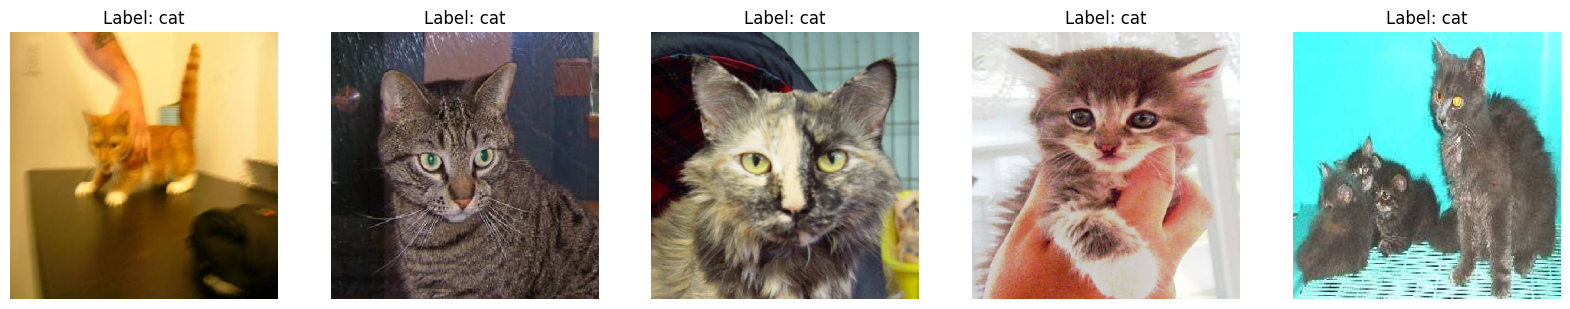

In [3]:


def load_images_from_folder(folder_path, target_size=(350, 350), max_images=1000):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg")) and count < max_images:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            if 'cat' in filename.lower():
                labels.append('cat')
            elif 'dog' in filename.lower():
                labels.append('dog')
            count += 1
    return np.array(images), labels

# Load training data
train_directory = 'M:/Studies/Sem 2/Machine learning/Assignment3/Project3_files/data/train'
train_images, train_labels = load_images_from_folder(train_directory)

# Plot some sample images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.imshow(train_images[i])
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')
plt.show()


To understand the distribution of the provided data

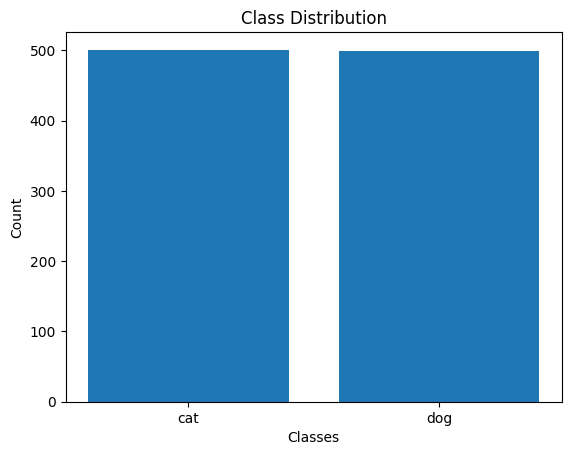

In [4]:
# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Split training data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.2, random_state=42)

# Visualize class distribution
labels, counts = np.unique(train_labels, return_counts=True)
plt.bar(labels, counts)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Here similar to train data, we are loading the test data for future use for prediction

In [5]:
def load_test_images(folder_path, target_size=(350, 350)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            filenames.append(filename)
    return np.array(images), filenames

# Load test data
test_directory = 'M:/Studies/Sem 2/Machine learning/Assignment3/Project3_files/data/test'
test_images, test_filenames = load_test_images(test_directory)


To fit the SVM model we are performing the PCA on the training data and then splitting it for train and validation purpose and the
fiiting the data to model

SVM Validation Accuracy: 0.51
SVM Validation Accuracy: 0.51
Precision: 0.532608695652174
Recall: 0.47115384615384615
F1 Score: 0.5
ROC AUC Score: 0.5399639423076922


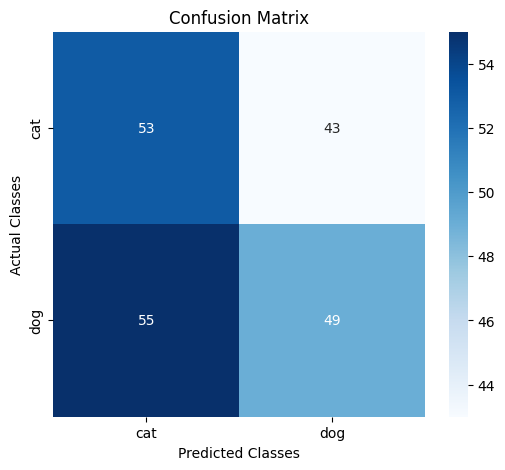

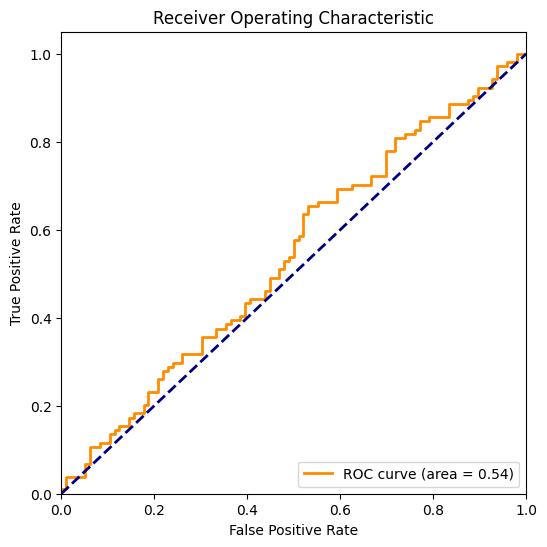

In [6]:
# Flatten images for SVM
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))

# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_val_pca = pca.transform(X_val_flat)

# SVM Training
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Evaluate SVM
svm_val_score = svm.score(X_val_pca, y_val)
print(f"SVM Validation Accuracy: {svm_val_score}")
y_val_pred = svm.predict(X_val_pca)

# Calculate additional metrics
precision, recall, f1_score, support = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
conf_matrix = confusion_matrix(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, svm.decision_function(X_val_pca))

# Print the metrics
print(f"SVM Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC Score: {roc_auc}")

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, svm.decision_function(X_val_pca))
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Here we are using the noraml training data for splitting for train and validation ad then fitting it into CNN model

c:\Users\rhyth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5090 - loss: 2.8180 - val_accuracy: 0.5200 - val_loss: 0.6841
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5224 - loss: 0.6732 - val_accuracy: 0.5650 - val_loss: 0.6645
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6609 - loss: 0.6277 - val_accuracy: 0.5850 - val_loss: 0.6610
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7576 - loss: 0.5408 - val_accuracy: 0.6300 - val_loss: 0.6362
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8005 - loss: 0.4279 - val_accuracy: 0.6100 - val_loss: 0.6967
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8578 - loss: 0.3384 - val_accuracy: 0.6000 - val_loss: 0.7964
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9207 - loss: 0.2416 - val_accuracy: 0.6400 - val_loss: 0.9030
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9386 - loss: 0.1862 - val_accuracy: 0.5900 - val_loss:

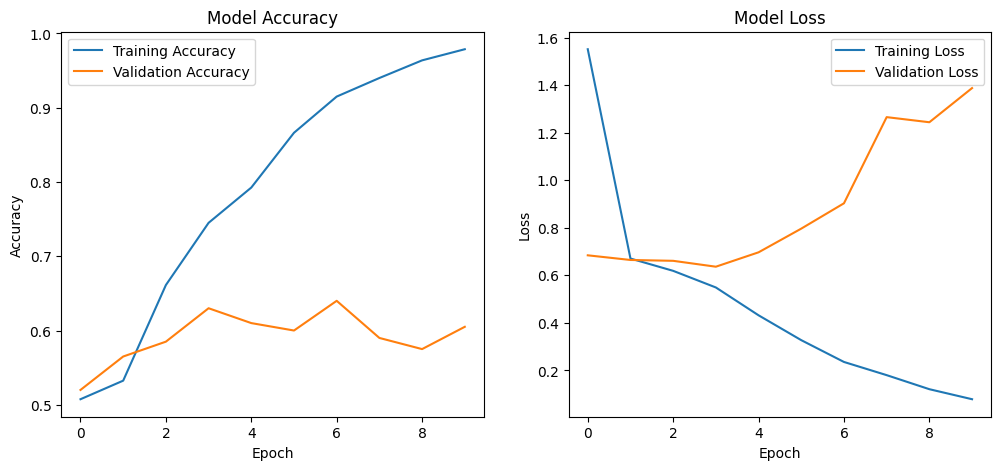

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step


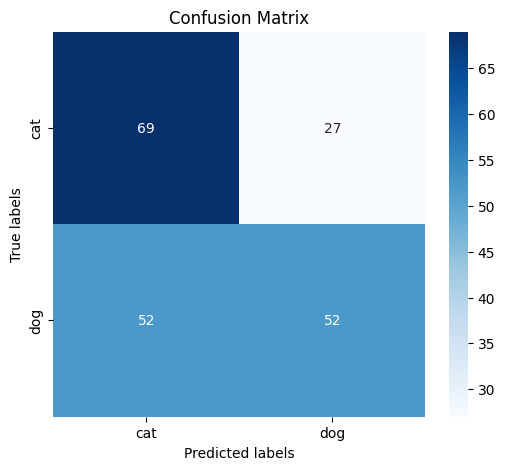

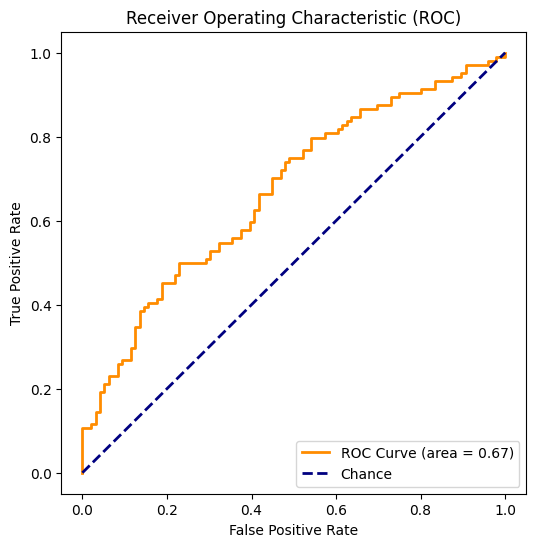

In [7]:
# CNN Model Setup
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate CNN
cnn_val_score = model.evaluate(X_val, y_val)[1]  # Get accuracy
print(f"CNN Validation Accuracy: {cnn_val_score}")

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions for confusion matrix and ROC curve
y_val_pred = model.predict(X_val)
y_val_pred_rounded = (y_val_pred > 0.5).astype(int)  # Binarize predictions for confusion matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_rounded)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Here we are predicting using the test data based on our best model that is CNN

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step
List of Predictions:
Image 1: Dog
Image 2: Cat
Image 3: Cat
Image 4: Cat
Image 5: Cat
Image 6: Cat
Image 7: Dog
Image 8: Cat
Image 9: Dog
Image 10: Cat
Image 11: Dog
Image 12: Dog
Image 13: Dog
Image 14: Dog
Image 15: Cat
Image 16: Cat
Image 17: Dog
Image 18: Cat
Image 19: Cat
Image 20: Cat
Image 21: Dog
Image 22: Cat
Image 23: Cat
Image 24: Dog
Image 25: Cat
Image 26: Dog
Image 27: Dog
Image 28: Cat
Image 29: Cat
Image 30: Cat
Image 31: Dog
Image 32: Cat
Image 33: Cat
Image 34: Cat
Image 35: Dog
Image 36: Dog
Image 37: Dog
Image 38: Dog
Image 39: Dog
Image 40: Cat
Image 41: Cat
Image 42: Cat
Image 43: Dog
Image 44: Dog
Image 45: Dog
Image 46: Cat
Image 47: Dog
Image 48: Dog
Image 49: Dog
Image 50: Cat
Image 51: Cat
Image 52: Cat
Image 53: Dog
Image 54: Cat
Image 55: Cat
Image 56: Dog
Image 57: Dog
Image 58: Cat
Image 59: Dog
Image 60: Cat
Image 61: Cat
Image 62: Dog
Image 63: Dog
Image 64: Cat
Image 65: Cat
Image 66: Cat
Image 67: Cat
Image 68: D

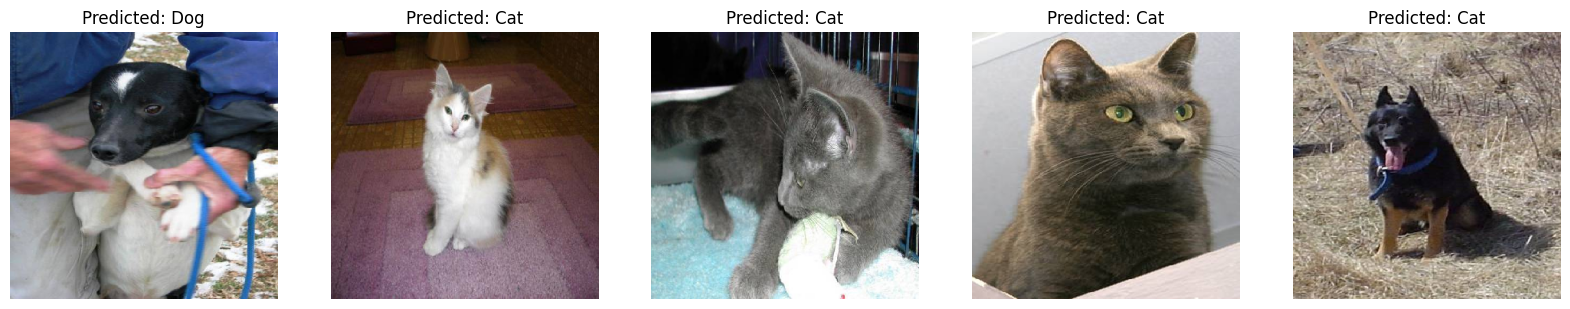

In [8]:
# Predictions for test data
test_predictions_proba = model.predict(test_images)
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert probabilities to binary output

# Creating a list of predictions
predicted_classes = ['Dog' if pred == 1 else 'Cat' for pred in test_predictions.flatten()]

# Optionally, print the list of predictions
print("List of Predictions:")
for idx, prediction in enumerate(predicted_classes):
    print(f"Image {idx + 1}: {prediction}")

# You might also want to check a few predictions with their corresponding images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Displaying 5 test images and their predictions
for i, ax in enumerate(axes):
    ax.imshow(test_images[i].squeeze(), cmap='gray')  
    ax.set_title(f"Predicted: {predicted_classes[i]}")
    ax.axis('off')
plt.show()


Here we are optmising the best model using hyper parameter and choosing the best to fit to the training model again.
Note: In the below output you can see an json url, its because I wasn't able to do this on my machine so used friends machine and later saved the model and used it here.

In [12]:
def build_model(hp):
    model = Sequential([
        Conv2D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
            activation='relu',
            input_shape=(350, 350, 3)
        ),
        MaxPooling2D(2, 2),
        Conv2D(
            filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(
            units=hp.Int('units', min_value=128, max_value=512, step=128),
            activation='relu'
        ),
        Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Set more trials for a real-world scenario
    executions_per_trial=1,
    directory='my_dir',
    project_name='image_classification'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of filters in the first convolutional layer is {best_hps.get('filters_1')},
and the optimal number of filters in the second convolutional layer is {best_hps.get('filters_2')}.
The optimal kernel size in the first convolutional layer is {best_hps.get('kernel_size_1')},
and the optimal kernel size in the second convolutional layer is {best_hps.get('kernel_size_2')}.
The optimal number of units in the dense layer is {best_hps.get('units')}.
The optimal dropout rate is {best_hps.get('dropout')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increase epochs for final training

Reloading Tuner from my_dir\image_classification\tuner0.json

The optimal number of filters in the first convolutional layer is 32,
and the optimal number of filters in the second convolutional layer is 128.
The optimal kernel size in the first convolutional layer is 3,
and the optimal kernel size in the second convolutional layer is 5.
The optimal number of units in the dense layer is 128.
The optimal dropout rate is 0.4.
The optimal learning rate for the optimizer is 0.00026679699283911065.

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.4878 - loss: 6.7783 - val_accuracy: 0.5200 - val_loss: 0.6897
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5718 - loss: 0.6829 - val_accuracy: 0.5250 - val_loss: 0.6882
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.6023 - loss: 0.6643 - val_accuracy: 0.4850 - val_loss: 0.8217
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6771 - loss: 0.6115 - val_accuracy: 0.5850 - val_loss: 0.66

Here again we are using the test data for prediction using our best model after optimisation

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step


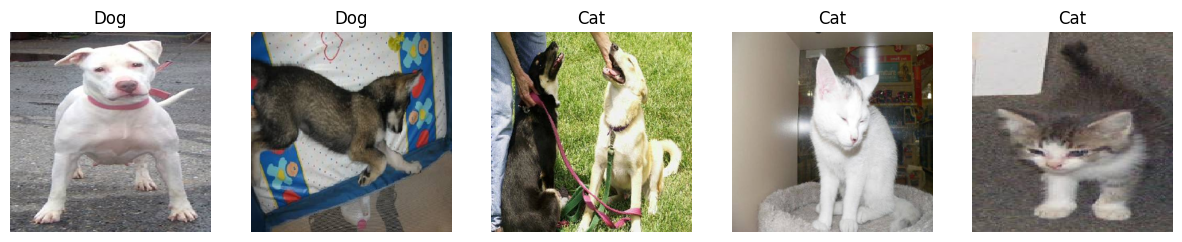

Predictions for the first 10 test images:
Image 1: Dog
Image 2: Dog
Image 3: Cat
Image 4: Cat
Image 5: Cat
Image 6: Cat
Image 7: Dog
Image 8: Dog
Image 9: Dog
Image 10: Cat


In [23]:

# Assuming 'test_images' are loaded and preprocessed similarly to your training data
# Make predictions
test_predictions_proba = model.predict(test_images)
test_predictions = (test_predictions_proba > 0.5).astype(int)

# Visualizing some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust the number of images to show
for i, ax in enumerate(axes):
    ax.imshow(test_images[i+25])
    ax.set_title('Dog' if test_predictions[i] == 1 else 'Cat')
    ax.axis('off')
plt.show()

# If you want to output the predictions, you could either print them or save to a file
print("Predictions for the first 10 test images:")
for i in range(10):  # Adjust based on how many predictions you want to see
    print(f"Image {i+1}: {'Dog' if test_predictions[i] == 1 else 'Cat'}")
